In [9]:
import pandas as pd
import numpy as np
import librosa as lib
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/home/alison/Documentos/Projeto-Tomate/datasets_generos/dataset_genero_mfcc.csv', sep=',')

In [3]:
data.head(21)

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,Annotation,label
0,10.WAV,-187.834915,49.854252,-6.525051,4.707772,1.334116,1.693677,6.264961,2.519773,1.206058,...,0.444205,2.252861,0.985763,1.885565,-0.026572,-0.801063,-0.571089,-0.822223,vibra_flor_1,Augochloropsis
1,10.WAV,-211.676758,48.164745,-1.568784,3.710127,-3.730522,-3.279997,-0.343598,-0.073257,0.746383,...,-1.024178,-0.240914,-0.574752,-0.193956,-0.603252,0.036737,-0.689467,0.040395,vibra_flor_1,Augochloropsis
2,10.WAV,-232.696899,81.410210,37.018658,20.403471,16.442812,14.575477,11.206918,6.474152,6.047267,...,1.250340,0.958684,-0.131907,-0.131134,-0.765925,-0.879593,-0.483463,-0.753808,voo,Augochloropsis
3,91.WAV,-185.587082,73.079796,8.960753,14.774915,6.392628,13.652942,10.269503,3.991142,4.798811,...,-1.759427,-1.076507,-2.575743,-1.058758,-0.872088,0.383461,0.684918,0.585753,vibra_flor_1,Augochloropsis
4,79.WAV,-176.042435,23.128117,1.009835,1.976837,10.874933,2.448837,9.874375,-8.328090,-2.791790,...,-3.763915,0.442332,0.830214,2.513018,0.919942,0.308315,-0.851657,-1.359397,vibra_flor_1,Augochloropsis
5,79.WAV,-249.484512,88.087601,29.755360,3.606536,7.679555,-0.524730,2.556100,-5.152030,-2.962143,...,-1.817652,-0.163246,-0.211375,0.676411,0.409480,1.065439,0.960984,0.707476,voo,Augochloropsis
6,72_90.WAV,-255.555954,62.533112,9.300890,6.245489,11.985186,10.531092,11.661766,4.740428,4.567764,...,2.895166,2.551942,0.574672,0.654496,-1.118530,-0.480824,-0.293434,0.013918,voo,Augochloropsis
7,72_90.WAV,-280.146057,54.297955,7.884189,6.636130,13.497029,9.726294,9.289383,3.105898,4.357107,...,1.844157,2.435470,0.461845,0.614008,-0.651013,-0.623990,-0.736763,-0.212305,voo,Augochloropsis
8,72_90.WAV,-259.030487,73.004448,25.110809,10.794285,16.821297,7.349238,8.206959,3.186376,3.754220,...,4.154097,4.041371,0.496710,0.165084,-1.600423,-1.357489,-1.568777,-0.486081,voo,Augochloropsis
9,72_90.WAV,-218.155014,48.403866,6.250520,-3.652588,8.985928,19.618826,14.956874,5.807299,10.039868,...,-0.659059,-0.240790,-1.464753,0.311305,-0.457829,-0.008502,-0.088560,0.801075,vibra_flor_1,Augochloropsis


In [4]:
target_names = data.label.unique()
target_names

array(['Augochloropsis', 'Bombus', 'Centris', 'Eulaema', 'Exomalopsis',
       'Melipona', 'Pseudoalglochloropsis', 'Xylocopa'], dtype=object)

In [26]:
stan = StandardScaler()

generos = []
euclidiano = []
similaridade = []
distancia = []
d = data.drop(['filename', 'Annotation', 'label'],axis=1)
stan.fit(d)
for target in target_names:
    df_flor = data[(data['label'] == target) & (data['Annotation'] != 'voo')]
    df_voo  = data[(data['label'] == target) & (data['Annotation'] == 'voo')]
    flor = df_flor.drop(['filename','Annotation', 'label'], axis=1).reset_index(drop=True)
    voo  = df_voo.drop(['filename','Annotation', 'label'], axis=1).reset_index(drop=True)

    euclidian_dis = []
    cos_sim = []
    corr = []

    for i in range(flor.shape[0]):
        f = list(flor.iloc[i])
        #f = stan.transform([f])
        for j in range(voo.shape[0]):
            v = list(voo.iloc[j])
            #v = stan.transform([v])
            #e = np.linalg.norm(np.array(f) - np.array(v))
            e = distance.euclidean(f, v)
            e = 1 / (1+e)
            d = distance.correlation(f, v)
            c = cosine_similarity(np.array(f).reshape(-1, 1), np.array(v).reshape(-1, 1))

            euclidian_dis.append(e)
            cos_sim.append(d)
            corr.append(c)

    generos.append(target)
    euclidiano.append(np.mean(euclidian_dis))
    similaridade.append(np.mean(cos_sim))
    distancia.append(np.mean(corr))

In [27]:
df = pd.DataFrame(None, columns=['Gêneros', 'Euclidean Distances', 'Cosine Similarity'])
df['Gêneros'] = generos
df['Euclidean Distances'] = euclidiano
df['Cosine Similarity'] = similaridade
#df['Correlation Distance'] = distancia
df

,Gêneros,Euclidean Distances,Cosine Similarity
0,Augochloropsis,0.013512,0.029711
1,Bombus,0.011868,0.051299
2,Centris,0.020259,0.025123
3,Eulaema,0.018542,0.033209
4,Exomalopsis,0.011868,0.060674
5,Melipona,0.018015,0.029414
6,Pseudoalglochloropsis,0.015605,0.027011
7,Xylocopa,0.019178,0.030397


In [28]:
df.describe()

,Euclidean Distances,Cosine Similarity
count,8.000000,8.000000
mean,0.016106,0.035855
std,0.003363,0.012895
min,0.011868,0.025123
25%,0.013101,0.028813
50%,0.016810,0.030054
75%,0.018701,0.037731
max,0.020259,0.060674


In [30]:
round(0.016016, 3)

0.016

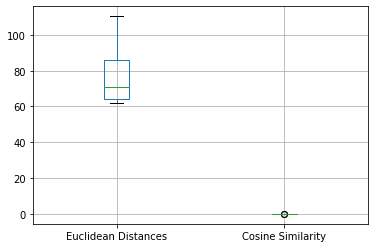

In [25]:
df.boxplot()